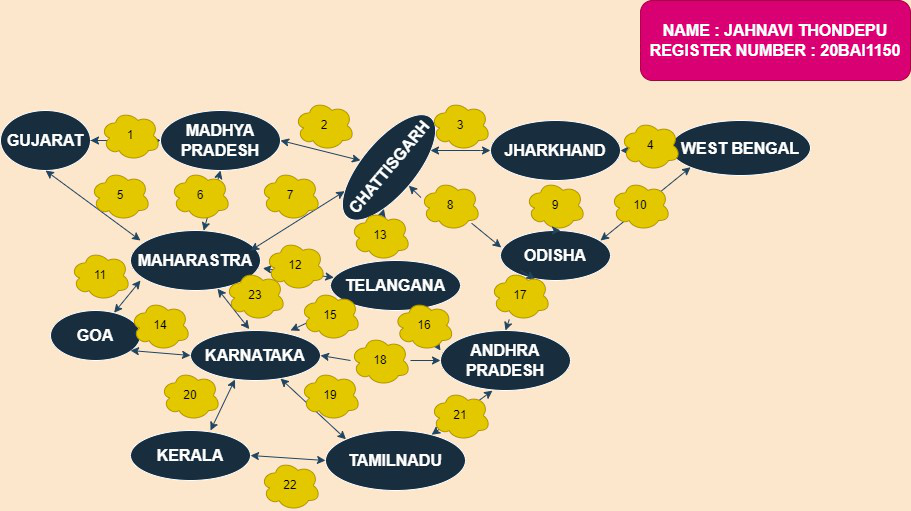

In [2]:
from PIL import Image
im=Image.open("/content/sample_data/dijk.jpg")
im.show()
display(im)

In [1]:
import heapq
import sys

class Graph:
    
    def __init__(self):
        self.vertices = {}
        
    def add_vertex(self, name, edges):
        self.vertices[name] = edges
    
    def shortest_path(self, start, finish):
        distances = {} # Distance from start to node
        previous = {}  # Previous node in optimal path from source
        nodes = [] # Priority queue of all nodes in Graph

        for vertex in self.vertices:
            if vertex == start: # Set root node as distance of 0
                distances[vertex] = 0
                heapq.heappush(nodes, [0, vertex])
            else:
                distances[vertex] = sys.maxsize
                heapq.heappush(nodes, [sys.maxsize, vertex])
            previous[vertex] = None
        
        while nodes:
            smallest = heapq.heappop(nodes)[1] # Vertex in nodes with smallest distance in distances
            if smallest == finish: # If the closest node is our target we're done so print the path
                path = []
                while previous[smallest]: # Traverse through nodes til we reach the root which is 0
                    path.append(smallest)
                    smallest = previous[smallest]
                return path
            if distances[smallest] == sys.maxsize: # All remaining vertices are inaccessible from source
                break
            
            for neighbor in self.vertices[smallest]: # Look at all the nodes that this vertex is attached to
                alt = distances[smallest] + self.vertices[smallest][neighbor] # Alternative path distance
                if alt < distances[neighbor]: # If there is a new shortest path update our priority queue (relax)
                    distances[neighbor] = alt
                    previous[neighbor] = smallest
                    for n in nodes:
                        if n[1] == neighbor:
                            n[0] = alt
                            break
                    heapq.heapify(nodes)
        return distances
        
    def __str__(self):
        return str(self.vertices)

if __name__ == '__main__':
    g = Graph()
    g.add_vertex('GUJARAT', {'MADHYAPRADESH' : 1,'MAHARASTRA' : 5})
    g.add_vertex('MADHYAPRADESH', {'GUJARAT' : 1, 'CHATTISGARH' : 2,'MAHARASTRA' : 6 })
    g.add_vertex('CHATTISGARH', {'MADHYAPRADESH' : 2,'MAHARASTRA' : 7,'TELANGANA' : 13,'JHARKHAND' : 3,'ODISHA' : 8})
    g.add_vertex('JHARKHAND', {'CHATTISGARH' : 3,'ODISHA' : 9,'WESTBENGAL' : 4})
    g.add_vertex('WESTBENGAL', {'JHARKHAND' : 4, 'ODISHA' : 10})
    g.add_vertex('MAHARASTRA', {'GUJARAT' : 5,'MADHYAPRADESH' : 6,'CHATTISGARH' : 7,'TELANGANA' : 12,'KARNATAKA' : 23,'GOA' : 11})
    g.add_vertex('TELANGANA', {'MAHARASTRA' : 12,'KARNATAKA' : 15,'ANDHRAPRADESH' : 16,'CHATTISGARH' : 13})
    g.add_vertex('ANDHRAPRADESH', {'ODISHA' : 17,'TELANGANA' : 16,'TAMILNADU' : 21,'KARNATAKA' : 18})
    g.add_vertex('ODISHA', {'CHATTISGARH' : 8,'JHARKHAND' : 9,'WESTBENGAL' : 10,'ANDHRAPRADESH' : 17})
    g.add_vertex('GOA', {'KARNATAKA' : 14,'MAHARASTRA' : 11})
    g.add_vertex('KARNATAKA', {'GOA' : 14,'MAHARASTRA' : 23,'TELANGANA' : 15,'ANDHRAPRADESH' : 18,'TAMILNADU' : 19,'KERALA' : 20})
    g.add_vertex('TAMILNADU', {'KARNATAKA' : 19,'ANDHRAPRADESH' : 21,'KERALA' : 22})
    g.add_vertex('KERALA', {'TAMILNADU' : 22, 'KARNATAKA' : 20})
    print(g.shortest_path('GUJARAT', 'TAMILNADU'))

['TAMILNADU', 'KARNATAKA', 'MAHARASTRA']
